In [1]:
using Plots, LaTeXStrings
using Plots.PlotMeasures
empty!(ARGS)
push!(ARGS, "G:/Hamburg/b20.0_mu0.4/lDGAConfig.toml")
include(joinpath(@__DIR__,"../examples/example00_lDGA.jl"))

using LaTeXStrings

  Activating project at `G:\Codes\LadderDGA.jl`


[ Info: Reading Inputs...
[ Info: Setting up calculation for kGrid 2Dsc-0.25-0.05-0.025 of size 10


DBG: NOT using diagonal terms in λ₀


┌ Info: Inputs Read. Starting Computation.
│     Local susceptibilities with ranges are:
│     χLoc_m(1:301) = 0.3838, χLoc_d(1:301) = 0.1017
│     sum χupup check (plain ?≈? tail sub ?≈? imp_dens ?≈? n/2 (1-n/2)): 0.2401531297823682 ?=? 0.2427835212727256 ?≈? 0.2427835212727254 ≟ 0.24275850716113093"
│ Local EoM check for the first 5 frequencies: 0.0033, 0.0033, 0.0033, 0.0033, 0.0033  
└     
[ Info: m channel: |∑χ(q=0,ω≠0)| = 0.001535305377 ≟ 0
[ Info: d channel: |∑χ(q=0,ω≠0)| = 0.004454577569 ≟ 0


DBG: NOT using diagonal terms in λ₀


In [3]:
mP = lDGAhelper.mP
kG = lDGAhelper.kG
U = mP.U
nden = mP.n
beta = mP.β
lim_se = U^2 * (nden/2) * (1 - nden/2)
se_tmp = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper);

xr = collect(axes(se_tmp,2))
iν_arr = LadderDGA.iν_array(beta, xr)
gimp = lDGAhelper.gImp[1,xr];

In [136]:
Fm = F_from_χ(:m, lDGAhelper)
Fd = F_from_χ(:d, lDGAhelper)
λ₀2 = calc_λ0(bubble, 1.0 .* (Fm), lDGAhelper; diag_zero=false);
λ₀Loc = calc_λ0(lDGAhelper.χ₀Loc, Fm, lDGAhelper.χ_m_loc, lDGAhelper.γ_m_loc, mP, sP)
kGridLoc = gen_kGrid(kGridsStr[1][1], 1)
Σ_ladderLoc = calc_Σ(lDGAhelper.χ_m_loc, lDGAhelper.γ_m_loc, lDGAhelper.χ_d_loc, lDGAhelper.γ_d_loc, lDGAhelper.χloc_m_sum,
        λ₀Loc, lDGAhelper.Σ_loc, lDGAhelper.gImp, kGridLoc, mP, sP, tc = ΣTail_Plain)

DBG: using diagonal terms in λ₀
DBG: NOT using diagonal terms in λ₀


LoadError: MethodError: no method matching gen_kGrid(::Tuple{String, Int64}, ::Int64)
The function `gen_kGrid` exists, but no method is defined for this combination of argument types.

[0mClosest candidates are:
[0m  gen_kGrid([91m::String[39m, ::Int64)
[0m[90m   @[39m [35mDispersions[39m [90mC:\Users\Atomt\.julia\packages\Dispersions\AYvnG\src\[39m[90m[4mKGrid.jl:76[24m[39m


In [126]:
tc_m = sum_kω(kGridLoc, lDGAhelper.χ_m_loc)
tc_d = sum_kω(kGridLoc, lDGAhelper.χ_d_loc)

0.10173262795095657

In [121]:
sum(lDGAhelper.χ_m_loc)/mP.β

0.38120402310413687

DBG: NOT using diagonal terms in λ₀


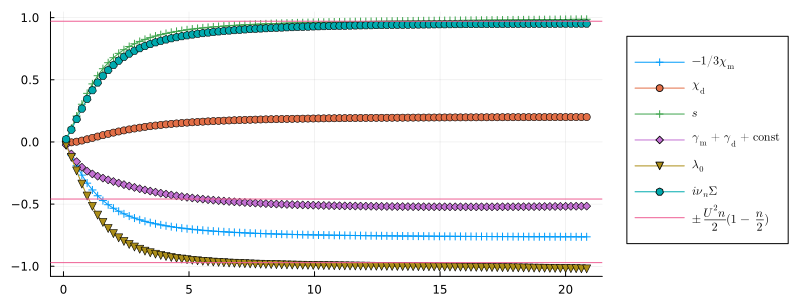

In [149]:
λ₀Loc = calc_λ0(lDGAhelper.χ₀Loc, Fm, lDGAhelper.χ_m_loc, lDGAhelper.γ_m_loc, mP, sP)
kGridLoc = gen_kGrid(kGridsStr[1][1], 1)
Σ_ladderLoc_parts = calc_Σ_parts(lDGAhelper.χ_m_loc, lDGAhelper.γ_m_loc, lDGAhelper.χ_d_loc, lDGAhelper.γ_d_loc, lDGAhelper.χloc_m_sum,
        λ₀Loc, lDGAhelper.Σ_loc, lDGAhelper.gImp, kGridLoc, mP, sP, tc = ΣTail_Plain);
gamma_sum = Σ_ladderLoc_parts[:,:,2] .+ Σ_ladderLoc_parts[:,:,4]  .+ Σ_ladderLoc_parts[:,:,5]
plot(xr, real(Σ_ladderLoc_parts[1,0:99,1] .* iν_arr),markershape=:auto, legend=:outerright, label = L"\chi_\mathrm{m}", xlabel=L"n", ylabel= L"\Sigma_\mathrm{part} \cdot \nu_n",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
plot(xr, real((-1/3) .* Σ_ladderLoc_parts[1,0:99,1] .* iν_arr),markershape=:auto, legend=:outerright, label = L"- 1/3 \chi_\mathrm{m}")
plot!(xr, real(Σ_ladderLoc_parts[1,0:99,3] .* iν_arr), markershape=:auto, label = L"\chi_\mathrm{d}")
plot!(xr, real(((Σ_ladderLoc_parts[1,0:99,1] .+ Σ_ladderLoc_parts[1,0:99,3] .+ gamma_sum[1,0:99]) ./ 2) .* iν_arr), markershape=:auto, label = L"s")
plot!(xr, real(gamma_sum[1,0:99] .* iν_arr), markershape=:auto, label = L"\gamma_\mathrm{m} + \gamma_\mathrm{d} + \mathrm{const}");
plot!(xr, real((Σ_ladderLoc_parts[1,0:99,6]) .* iν_arr), markershape=:auto, label = L"\lambda_0");
plot!(xr, real(sum(Σ_ladderLoc_parts[1,0:99,1:6], dims=2)[:,1] .* iν_arr), markershape=:auto, label = L"i \nu_n\Sigma ")
hline!([-lim_se, lim_se, -(U)*((1/3)*tc_m+tc_d)], label=L"\pm \frac{U^2n}{2}(1-\frac{n}{2})",size=(800,300))

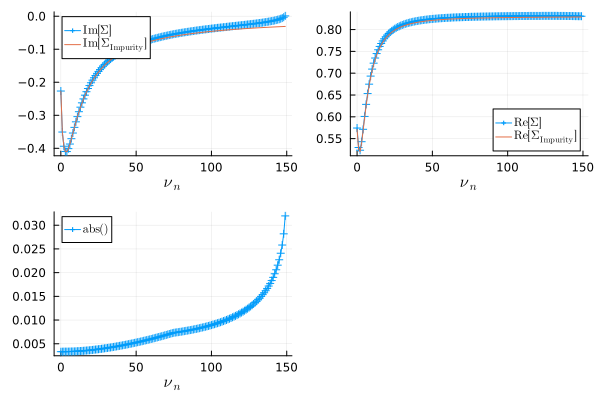

In [4]:
Fm = F_from_χ(lDGAhelper.χDMFT_m, lDGAhelper.gImp[1, :], sP, mP.β)
Fd = F_from_χ(lDGAhelper.χDMFT_d, lDGAhelper.gImp[1, :], sP, mP.β);
ΣLoc_m, ΣLoc_d = calc_local_EoM(Fm, Fd, lDGAhelper.gImp[1, :], mP, sP)
p1 = plot(imag(0.5 .* (ΣLoc_m .+ ΣLoc_d)),markershape=:auto, xlabel=L"\nu_n", label=L"\mathrm{Im}[\Sigma]")
plot!(imag(lDGAhelper.Σ_loc[axes(ΣLoc_m,1)]), label=L"\mathrm{Im}[\Sigma_\mathrm{Impurity}]")
p2 = plot(real(0.5 .* (ΣLoc_m .+ ΣLoc_d)),markershape=:auto, xlabel=L"\nu_n", label=L"\mathrm{Re}[\Sigma]")
plot!(real(lDGAhelper.Σ_loc[axes(ΣLoc_m,1)]), label=L"\mathrm{Re}[\Sigma_\mathrm{Impurity}]")
p3 = plot(abs.(0.5 .* (ΣLoc_m .+ ΣLoc_d) .- lDGAhelper.Σ_loc[axes(ΣLoc_m,1)]),markershape=:auto, xlabel=L"\nu_n", label=L"\mathrm{abs}()")
plot(p1, p2, p3)

In [106]:
λd_test = 5.5
rhs_d0,PP_p1 = LadderDGA.LambdaCorrection.λm_rhs(χm, χd, lDGAhelper)
λm_d0  = LadderDGA.LambdaCorrection.λm_correction_val(χm, rhs_d0, lDGAhelper)
rhs,PP_p1 = LadderDGA.LambdaCorrection.λm_rhs(χm, χd, lDGAhelper, λd=λd_test)
λm  = LadderDGA.LambdaCorrection.λm_correction_val(χm, rhs, lDGAhelper)
rhs,PP_p1 = LadderDGA.LambdaCorrection.λm_rhs(χm, χd, lDGAhelper, λd=λd_test)
λm2  = LadderDGA.LambdaCorrection.λm_correction_val2(χm, rhs, lDGAhelper)
se =  calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm, λd = λd_test, tc = ΣTail_Full)
se_ntc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm, λd = λd_test, tc = ΣTail_Plain);
se2 =  calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm2, λd = λd_test, tc = ΣTail_Full)
se_ntc2 = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm2, λd = λd_test, tc = ΣTail_Plain);
se_parts =  calc_Σ_parts(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm, λd=λd_test)
se_parts2 =  calc_Σ_parts(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm2, λd=λd_test);
se_parts_d0 =  calc_Σ_parts(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_d0, λd=0.0);

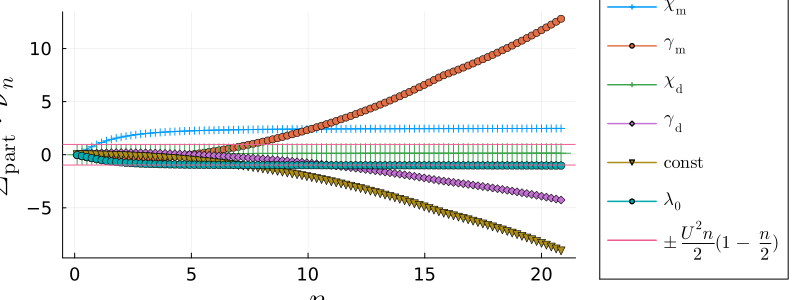

In [107]:
plot(xr, real(se_parts[1,0:99,1] .* iν_arr),markershape=:auto, legend=:outerright, label = L"\chi_\mathrm{m}", xlabel=L"n", ylabel= L"\Sigma_\mathrm{part} \cdot \nu_n",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
plot!(xr, real((se_parts[1,0:99,2]) .* iν_arr), markershape=:auto, label = L"\gamma_\mathrm{m}");
plot!(xr, real(se_parts[1,0:99,3] .* iν_arr), markershape=:auto, label = L"\chi_\mathrm{d}", markersize=10);
plot!(xr, real(se_parts[1,0:99,4] .* iν_arr), markershape=:auto, label = L"\gamma_\mathrm{d}");
plot!(xr, real(se_parts[1,0:99,5] .* iν_arr), markershape=:auto, label = L"\mathrm{const}");
plot!(xr, real((se_parts[1,0:99,6]) .* iν_arr), markershape=:auto, label = L"\lambda_0")
hline!([-lim_se, lim_se], label=L"\pm \frac{U^2n}{2}(1-\frac{n}{2})",size=(800,300))

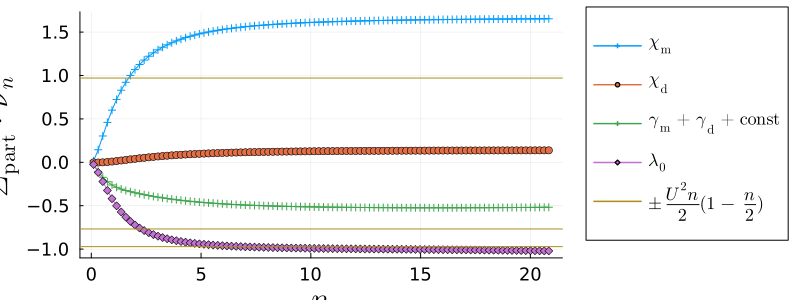

In [140]:
plot(xr, real(se_parts2[1,0:99,1] .* iν_arr),markershape=:auto, legend=:outerright, label = L"\chi_\mathrm{m}", xlabel=L"n", ylabel= L"\Sigma_\mathrm{part} \cdot \nu_n",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
plot!(xr, real(se_parts2[1,0:99,3] .* iν_arr), markershape=:auto, label = L"\chi_\mathrm{d}")
plot!(xr, real((se_parts2[1,0:99,2] .+ se_parts[1,0:99,4]  .+ se_parts[1,0:99,5]) .* iν_arr), markershape=:auto, label = L"\gamma_\mathrm{m} + \gamma_\mathrm{d} + \mathrm{const}");
plot!(xr, real((se_parts2[1,0:99,6]) .* iν_arr), markershape=:auto, label = L"\lambda_0");
#plot!(xr, real(sum(se_parts2[1,0:99,1:6], dims=2)[:,1] .* iν_arr), markershape=:auto, label = L"i \nu_n\Sigma ")
hline!([-lim_se, lim_se, -(2*U/2)*tc_m], label=L"\pm \frac{U^2n}{2}(1-\frac{n}{2})",size=(800,300))

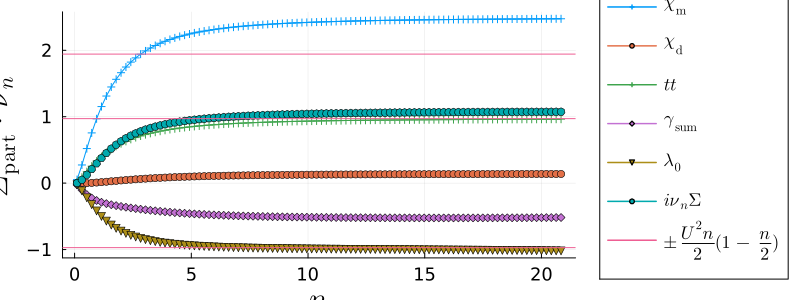

In [112]:
se_gamma_sum = se_parts[:,:,2] .+ se_parts[:,:,4]  .+ se_parts[:,:,5]
plot(xr, real(se_parts[1,0:99,1] .* iν_arr),markershape=:auto, legend=:outerright, label = L"\chi_\mathrm{m}", xlabel=L"n", ylabel= L"\Sigma_\mathrm{part} \cdot \nu_n",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
plot!(xr, real(se_parts[1,0:99,3] .* iν_arr), markershape=:auto, label = L"\chi_\mathrm{d}")
plot!(xr, real(((1/3) .* se_parts[1,0:99,1]  .+ se_parts[1,0:99,3]) .* iν_arr), markershape=:auto, label = L"tt")
#plot!(xr, real((se_parts[1,0:99,1] .+ se_parts[1,0:99,3] .+ se_gamma_sum[1,0:99] ) .* iν_arr), markershape=:auto, label = L"\gamma_{\mathrm{sum}}")
plot!(xr, real(se_gamma_sum[1,0:99] .* iν_arr), markershape=:auto, label = L"\gamma_{\mathrm{sum}}");
#plot!(xr, real(gamma_sum[1,0:99] .* iν_arr), markershape=:auto, label = L"\gamma_{\mathrm{sum},\mathrm{loc}}");
plot!(xr, real((se_parts[1,0:99,6]) .* iν_arr), markershape=:auto, label = L"\lambda_0");
plot!(xr, real(sum(se_parts[1,0:99,1:6], dims=2)[:,1] .* iν_arr), markershape=:auto, label = L"i \nu_n\Sigma ")
hline!([-lim_se, lim_se, 2*lim_se], label=L"\pm \frac{U^2n}{2}(1-\frac{n}{2})",size=(800,300))

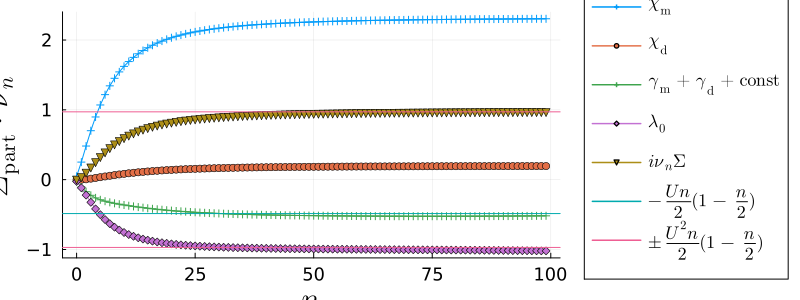

In [9]:
plot(xr, real(se_parts_d0[1,0:99,1] .* iν_arr),markershape=:auto, legend=:outerright, label = L"\chi_\mathrm{m}", xlabel=L"n", ylabel= L"\Sigma_\mathrm{part} \cdot \nu_n",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
plot!(xr, real(se_parts_d0[1,0:99,3] .* iν_arr), markershape=:auto, label = L"\chi_\mathrm{d}")
plot!(xr, real((se_parts_d0[1,0:99,2] .+ se_parts_d0[1,0:99,4]  .+ se_parts_d0[1,0:99,5]) .* iν_arr), markershape=:auto, label = L"\gamma_\mathrm{m} + \gamma_\mathrm{d} + \mathrm{const}");
plot!(xr, real((se_parts_d0[1,0:99,6]) .* iν_arr), markershape=:auto, label = L"\lambda_0");
plot!(xr, real(sum(se_parts_d0[1,0:99,1:6], dims=2)[:,1] .* iν_arr), markershape=:auto, label = L"i \nu_n\Sigma ")
cm = sum_ω(lDGAhelper.χ_m_loc)
cd = sum_ω(lDGAhelper.χ_d_loc)

#hline!([cm, cd], linewidth=4)
hline!([-lim_se/U], label=L"- \frac{Un}{2}(1-\frac{n}{2})")
hline!([-lim_se, lim_se], label=L"\pm \frac{U^2n}{2}(1-\frac{n}{2})",size=(800,300))

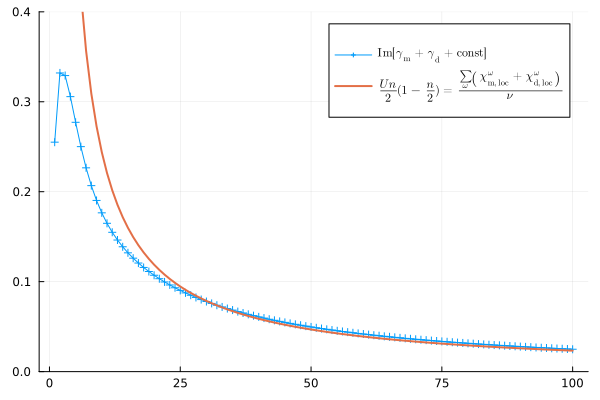

In [10]:
cm = sum_ω(lDGAhelper.χ_m_loc)
cd = sum_ω(lDGAhelper.χ_d_loc)
tt = se_parts[1,0:99,2] .+ se_parts[1,0:99,4]  .+ se_parts[1,0:99,5]
plot(imag(tt), markershape=:auto, ylims=(0,0.4), label=L"\mathrm{Im}[\gamma_\mathrm{m} + \gamma_\mathrm{d} + \mathrm{const}]")
plot!((cm + cd) ./ imag(iν_arr), linewidth=2, label=L"\frac{Un}{2}(1-\frac{n}{2}) = \frac{\sum_{\omega}\left( \chi^{\omega}_{\mathrm{m},\mathrm{loc}} + \chi^{\omega}_{\mathrm{d},\mathrm{loc}}\right)}{\nu}")

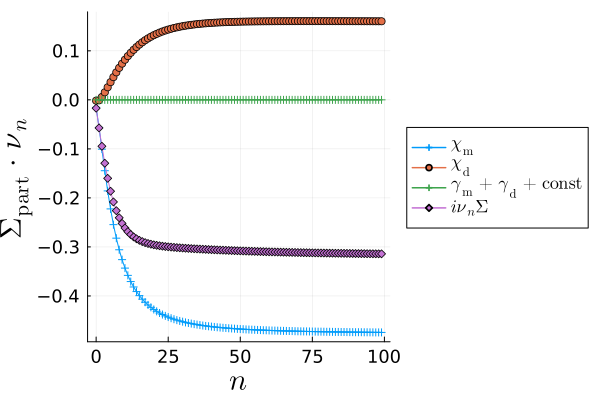

In [11]:
plot(xr, real((se_parts_d0[1,0:99,1] .- se_parts[1,0:99,1]) .* iν_arr),markershape=:auto, legend=:outerright, label = L"\chi_\mathrm{m}", xlabel=L"n", ylabel= L"\Sigma_\mathrm{part} \cdot \nu_n",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
plot!(xr, real((se_parts_d0[1,0:99,3] .- se_parts[1,0:99,3]) .* iν_arr), markershape=:auto, label = L"\chi_\mathrm{d}")
plot!(xr, real(((se_parts_d0[1,0:99,2] .+ se_parts_d0[1,0:99,4]  .+ se_parts_d0[1,0:99,5]) .- (se_parts[1,0:99,2] .+ se_parts[1,0:99,4]  .+ se_parts[1,0:99,5])) .* iν_arr), markershape=:auto, label = L"\gamma_\mathrm{m} + \gamma_\mathrm{d} + \mathrm{const}");
plot!(xr, real((sum(se_parts_d0[1,0:99,1:6], dims=2)[:,1] .- sum(se_parts[1,0:99,1:6], dims=2)[:,1]) .* iν_arr), markershape=:auto, label = L"i \nu_n\Sigma ")

In [12]:
λm_d0

0.023715674563837587

In [13]:
λm

-0.01713822806555705

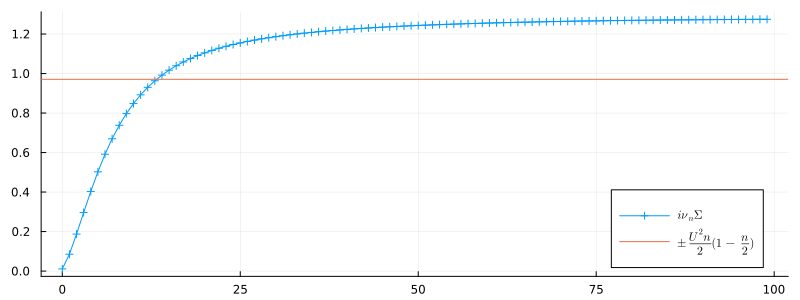

In [14]:
plot(xr, real(sum(se_parts[1,0:99,1:6], dims=2)[:,1] .* iν_arr), markershape=:auto, label = L"i \nu_n\Sigma ")
hline!([lim_se], label=L"\pm \frac{U^2n}{2}(1-\frac{n}{2})",size=(800,300))

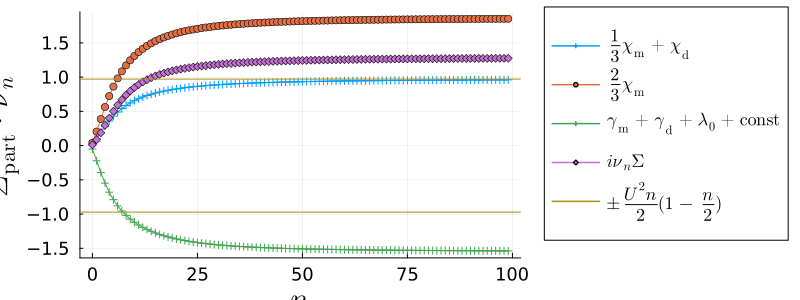

In [15]:
plot(xr, real(((1/3) * se_parts[1,0:99,1] .+ se_parts[1,0:99,3]) .* iν_arr),markershape=:auto, legend=:outerright, label = L"\frac{1}{3} \chi_\mathrm{m} + \chi_\mathrm{d}", xlabel=L"n", ylabel= L"\Sigma_\mathrm{part} \cdot \nu_n",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
plot!(xr, real(((2/3) * se_parts[1,0:99,1] ) .* iν_arr),markershape=:auto, label = L"\frac{2}{3} \chi_\mathrm{m}", xlabel=L"n", ylabel= L"\Sigma_\mathrm{part} \cdot \nu_n",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
plot!(xr, real((se_parts[1,0:99,2] .+ se_parts[1,0:99,4]  .+ se_parts[1,0:99,5] .+ se_parts[1,0:99,6]) .* iν_arr), markershape=:auto, label = L"\gamma_\mathrm{m} + \gamma_\mathrm{d} + \lambda_0 + \mathrm{const}");
plot!(xr, real(sum(se_parts[1,0:99,1:6], dims=2)[:,1] .* iν_arr), markershape=:auto, label = L"i \nu_n\Sigma ")
hline!([-lim_se, lim_se], label=L"\pm \frac{U^2n}{2}(1-\frac{n}{2})",size=(800,300))

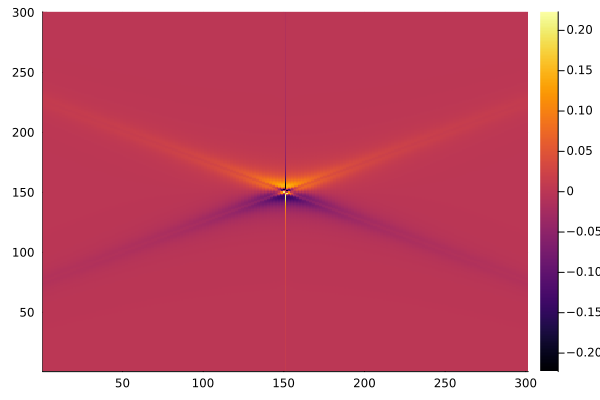

In [16]:
heatmap(imag(γm[1,:,:]))

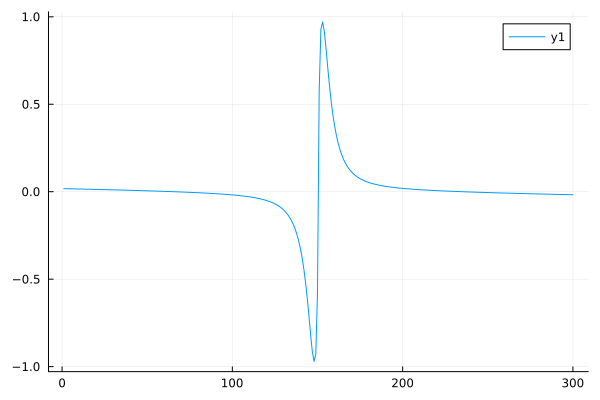

In [17]:
plot(imag(γd[1,:,151]))

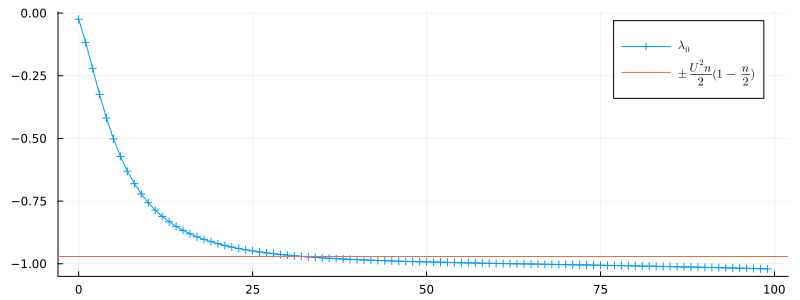

In [18]:
plot(xr, real((se_parts[1,0:99,6]) .* iν_arr), markershape=:auto, label = L"\lambda_0");
hline!([-lim_se], label=L"\pm \frac{U^2n}{2}(1-\frac{n}{2})",size=(800,300))

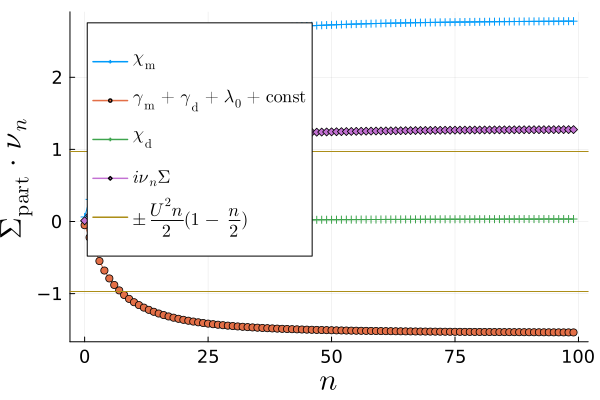

In [19]:
plot(xr, real(se_parts[1,0:99,1] .* iν_arr),markershape=:auto, legend=:topleft, label = L"\chi_\mathrm{m}", xlabel=L"n", ylabel= L"\Sigma_\mathrm{part} \cdot \nu_n",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
plot!(xr, real((se_parts[1,0:99,2] .+ se_parts[1,0:99,4]  .+ se_parts[1,0:99,5] .+ se_parts[1,0:99,6]) .* iν_arr), markershape=:auto, label = L"\gamma_\mathrm{m} + \gamma_\mathrm{d} + \lambda_0 + \mathrm{const}");
plot!(xr, real(se_parts[1,0:99,3] .* iν_arr), markershape=:auto, label = L"\chi_\mathrm{d}")
plot!(xr, real(sum(se_parts[1,0:99,1:6], dims=2)[:,1] .* iν_arr), markershape=:auto, label = L"i \nu_n\Sigma ")
hline!([-lim_se, lim_se], label=L"\pm \frac{U^2n}{2}(1-\frac{n}{2})")

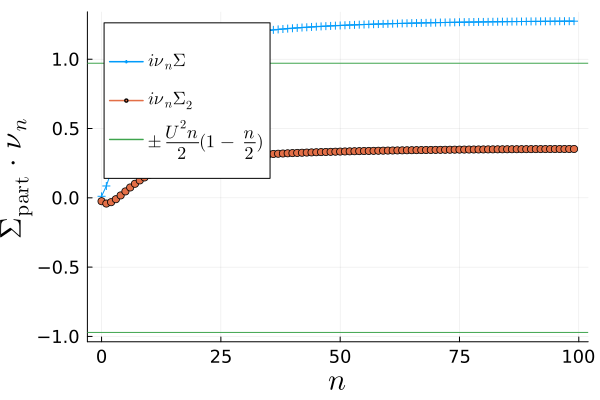

In [20]:
plot(xr,real(sum(se_parts[1,0:99,1:6], dims=2)[:,1] .* iν_arr),markershape=:auto, legend=:topleft, label =L"i \nu_n\Sigma ", xlabel=L"n", ylabel= L"\Sigma_\mathrm{part} \cdot \nu_n",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
plot!(xr, real(sum(se_parts2[1,0:99,1:6], dims=2)[:,1] .* iν_arr), markershape=:auto, label = L"i \nu_n\Sigma_2 ")
hline!([-lim_se, lim_se], label=L"\pm \frac{U^2n}{2}(1-\frac{n}{2})")

In [21]:
res_m_ntc  = λm_correction(χm, γm, χd, γd, λ₀, lDGAhelper, tc=ΣTail_Plain)
res_m_f      = λm_correction(χm, γm, χd, γd, λ₀, lDGAhelper, tc=ΣTail_Full)
res_m_s      = λm_correction(χm, γm, χd, γd, λ₀, lDGAhelper, tc=ΣTail_ExpStep{LadderDGA.default_ΣTail_ExpStep_δ})
res_dm_ntc = λdm_correction(χm, γm, χd, γd, λ₀, lDGAhelper, tc=ΣTail_Plain)
res_dm_f     = λdm_correction(χm, γm, χd, γd, λ₀, lDGAhelper, tc=ΣTail_Full)
res_dm_s     = λdm_correction(χm, γm, χd, γd, λ₀, lDGAhelper, tc=ΣTail_ExpStep{LadderDGA.default_ΣTail_ExpStep_δ})
se =  calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = 0.0, λd = 0.0, tc = ΣTail_Full)
se_ntc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = 0.0, λd = 0.0, tc = ΣTail_Plain);

┌ Error: WARNING. SKIPPING λ correction because NaN is not finite!
└ @ LadderDGA.LambdaCorrection G:\Codes\LadderDGA.jl\src\LambdaCorrection\common.jl:43
┌ Error: WARNING. SKIPPING λ correction because NaN is not finite!
└ @ LadderDGA.LambdaCorrection G:\Codes\LadderDGA.jl\src\LambdaCorrection\common.jl:43
┌ Error: WARNING. SKIPPING λ correction because NaN is not finite!
└ @ LadderDGA.LambdaCorrection G:\Codes\LadderDGA.jl\src\LambdaCorrection\common.jl:43


In [22]:
mP = lDGAhelper.mP
kG = lDGAhelper.kG
U = mP.U
nden = mP.n
beta = mP.β
lim_se = U^2 * (nden/2) * (1 - nden/2);

In [23]:

xr = collect(axes(se_ntc,2))
iν_arr = LadderDGA.iν_array(beta, xr)
gimp = lDGAhelper.gImp[1,xr]
#se_ntc
λm_test = res_dm_ntc.λm
λd_test = res_dm_ntc.λd
Σλ_ntc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_test, λd = λd_test, tc = :plain);
Σλ_tc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_test, λd = λd_test, tc = :full);
tc_factor_full = LadderDGA.tail_factor(mP.U, mP.β, mP.n, lDGAhelper.Σ_loc, iν_arr; mode=:full)
tc_factor_exp_1 = LadderDGA.tail_factor(mP.U, mP.β, mP.n, lDGAhelper.Σ_loc, iν_arr; mode=:exp_step, δ=0.001)
tc_factor_exp_2 = LadderDGA.tail_factor(mP.U, mP.β, mP.n, lDGAhelper.Σ_loc, iν_arr; mode=:exp_step, δ=0.05)
tc_factor_exp_3 = LadderDGA.tail_factor(mP.U, mP.β, mP.n, lDGAhelper.Σ_loc, iν_arr; mode=:exp_step, δ=0.1)
tc_term_full  = LadderDGA.tail_correction_term(sum_kω(kG, χm, λ = λm_test), lDGAhelper.χloc_m_sum, tc_factor_full)
tc_term_exp_1  = LadderDGA.tail_correction_term(sum_kω(kG, χm, λ = λm_test), lDGAhelper.χloc_m_sum, tc_factor_exp_1)
tc_term_exp_2  = LadderDGA.tail_correction_term(sum_kω(kG, χm, λ = λm_test), lDGAhelper.χloc_m_sum, tc_factor_exp_2)
tc_term_exp_3  = LadderDGA.tail_correction_term(sum_kω(kG, χm, λ = λm_test), lDGAhelper.χloc_m_sum, tc_factor_exp_3)

plot(xr, real(Σλ_ntc[1,:].parent .* iν_arr), ylims=(0.85,1.25), markershape=:auto, legend=:topright, label = L"\mathrm{plain}", xlabel=L"n", ylabel= L"\Sigma \cdot \nu_n",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
#plot!(xr, real(Σλ_tc[1,:].parent .* iν_arr), markershape=:auto, label = L"\mathrm{improved}")
plot!(xr, real((Σλ_ntc[:,:].parent .+ (tc_term_full ))[1,:] .* iν_arr), markershape=:auto, label = L"\mathrm{impr., full}")
plot!(xr, real((Σλ_ntc[:,:].parent .+ (tc_term_exp_1  ))[1,:] .* iν_arr), markershape=:auto, label = L"\mathrm{impr., step}")
plot!(xr, real(gimp .* iν_arr), markershape=:auto, label = L"G_\mathrm{imp}")
hline!([lim_se], linewidth=2, label=L"U^2 \frac{n}{2} \left(1 - \frac{n}{2} \right)")
#

LoadError: TypeError: in keyword argument tc, expected Type{<:ΣTail}, got a value of type Symbol

In [24]:
tc_term_exp_1  = LadderDGA.tail_correction_term(sum_kω(kG, χm, λ = λm_test), lDGAhelper.χloc_m_sum, tc_factor_exp_1)
tc_term_exp_2  = LadderDGA.tail_correction_term(sum_kω(kG, χm, λ = λm_test), lDGAhelper.χloc_m_sum, tc_factor_exp_2)
tc_term_exp_3  = LadderDGA.tail_correction_term(sum_kω(kG, χm, λ = λm_test), lDGAhelper.χloc_m_sum, tc_factor_exp_3)

plot(xr, real(Σλ_ntc[1,:].parent .* iν_arr), ylims=(0.85,1.25), size=(800,400), markershape=:auto, legend=:outerright, label = L"\mathrm{plain}", xlabel=L"n", ylabel= L"\Sigma \cdot \nu_n",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
#plot!(xr, real(Σλ_tc[1,:].parent .* iν_arr), markershape=:auto, label = L"\mathrm{improved}")
#plot!(xr, real((Σλ_ntc[:,:].parent .+ (tc_term_full ))[1,:] .* iν_arr), markershape=:auto, label = L"\mathrm{impr., full}")
plot!(xr, real((Σλ_ntc[:,:].parent .+ (tc_term_exp_1 ))[1,:] .* iν_arr), markershape=:auto, label = L"\mathrm{impr., step}, \delta=0.001")
plot!(xr, real((Σλ_ntc[:,:].parent .+ (tc_term_exp_2 ))[1,:] .* iν_arr), markershape=:auto, label = L"\mathrm{impr., step}, \delta=0.05=\frac{1}{\beta}")
plot!(xr, real((Σλ_ntc[:,:].parent .+ (tc_term_exp_3 ))[1,:] .* iν_arr), markershape=:auto, label = L"\mathrm{impr., step}, \delta=0.1")
plot!(xr, real(gimp .* iν_arr), markershape=:auto, label = L"G_\mathrm{imp}")
hline!([lim_se], linewidth=2, label=L"U^2 \frac{n}{2} \left(1 - \frac{n}{2} \right)")

LoadError: UndefVarError: `tc_factor_exp_1` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [25]:
plot(xr, imag(Σλ_ntc[1,:].parent), xlims=(-1,20), ylims=(-0.8,0.0),markershape=:auto, markersize=10, legend=:bottomright,label = L"\mathrm{plain}", xlabel=L"n", ylabel= L"\Sigma",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
plot!(xr, imag(Σλ_tc[1,:].parent), markershape=:auto, label = L"\mathrm{impr, full}")
plot!(xr, imag((Σλ_ntc[:,:].parent .+ (tc_term_exp_1 ))[1,:]), markershape=:auto, label = L"\mathrm{impr., step}, δ=0.001")
plot!(xr, imag((Σλ_ntc[:,:].parent .+ (tc_term_exp_2 ))[1,:]), markershape=:auto, label = L"\mathrm{impr., step}, δ=0.01")
plot!(xr, imag((Σλ_ntc[:,:].parent .+ (tc_term_exp_3 ))[1,:]), markershape=:auto, label = L"\mathrm{impr., step}, δ=0.1")
#plot!(xr, imag(gimp ), markershape=:auto, label = L"G_\mathrm{imp}")

LoadError: UndefVarError: `Σλ_ntc` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [26]:
xr_dm_01, fr_dm_01 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=30, λmin=-2.5, λmax=0.0, tc=ΣTail_Plain)
xr_dm_02, fr_dm_02 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=30, λmin=-2.5, λmax=0.0, tc=ΣTail_Full)
xr_dm_05, fr_dm_03 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=30, λmin=-2.5, tc=ΣTail_ExpStep{0.01}, λmax=0.0);
xr_dm_04, fr_dm_04 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=30, λmin=-2.5, tc=ΣTail_ExpStep{0.1}, λmax=0.0);
xr_dm_06, fr_dm_05 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=30, λmin=-2.5, tc=ΣTail_ExpStep{0.15}, λmax=0.0);
xr_dm_06, fr_dm_06 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=30, λmin=-2.5, tc=ΣTail_ExpStep{0.2}, λmax=0.0);
xr_dm_07, fr_dm_07 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=30, λmin=-2.5, tc=ΣTail_ExpStep{1.0}, λmax=0.0);

In [27]:
λd_min = LadderDGA.LambdaCorrection.get_λd_min(χm, γm, χd, γd, λ₀, lDGAhelper)

4.297834742110864

In [28]:
lDGAhelper.mP.n

0.8298060772075676

In [29]:
μ_new, G_ladder, Σ_ladder = LadderDGA.LambdaCorrection.calc_G_Σ(χm, γm, χd, γd, λ₀, 0.0, 0.0, lDGAhelper, tc=ΣTail_ExpStep{0.15});
nd = filling_pos(G_ladder[:,0:600],  lDGAhelper.kG, lDGAhelper.mP.U, lDGAhelper.mP.μ, lDGAhelper.mP.β)

0.7951354488576536

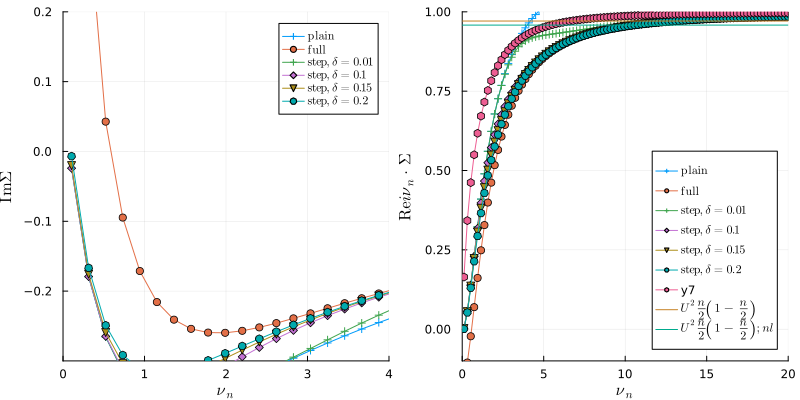

In [30]:
se_01 =  calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = 0.0, λd = 3.0, tc = ΣTail_Plain)
se_02 =  calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = 0.0, λd = 3.0, tc = ΣTail_Full)
se_03 =  calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = 0.0, λd = 3.0, tc = ΣTail_ExpStep{0.01})
se_04 =  calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = 0.0, λd = 3.0, tc = ΣTail_ExpStep{0.1})
se_05 =  calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = 0.0, λd = 3.0, tc = ΣTail_ExpStep{0.15})
se_06 =  calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = 0.0, λd = 3.0, tc = ΣTail_ExpStep{0.2});
se_07 =  calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = 0.0, λd = 3.0, tc = ΣTail_ExpStep{1.0});

inu = LadderDGA.iν_array(χm.β, first(axes(se_01,2)):last(axes(se_01,2)))
xr = imag(inu)
p1 = plot(xr, imag(se_01[1,:].parent), label=L"\mathrm{plain}" , markershape=:auto, xlims=(0,4), ylims=(-0.3,0.2), xlabel=L"\nu_n", ylabel=L"\mathrm{Im}\Sigma")
plot!(p1, xr, imag(se_02[1,:].parent), label=L"\mathrm{full}" ,markershape=:auto)
plot!(p1, xr, imag(se_03[1,:].parent), label=L"\mathrm{step}, \delta=0.01", markershape=:auto)
plot!(p1, xr, imag(se_04[1,:].parent), label=L"\mathrm{step}, \delta=0.1", markershape=:auto)
plot!(p1, xr, imag(se_05[1,:].parent), label=L"\mathrm{step}, \delta=0.15", markershape=:auto)
plot!(p1, xr, imag(se_06[1,:].parent), label=L"\mathrm{step}, \delta=0.2", markershape=:auto)

p2 = plot(xr, real(inu .* se_01[1,:].parent), label=L"\mathrm{plain}" , markershape=:auto, xlims=(0,20), ylims=(-0.1,1.0), xlabel=L"\nu_n", ylabel=L"\mathrm{Re} i\nu_n \cdot \Sigma")
plot!(p2, xr, real(inu .* se_02[1,:].parent), label=L"\mathrm{full}" ,markershape=:auto)
plot!(p2, xr, real(inu .* se_03[1,:].parent), label=L"\mathrm{step}, \delta=0.01", markershape=:auto)
plot!(p2, xr, real(inu .* se_04[1,:].parent), label=L"\mathrm{step}, \delta=0.1", markershape=:auto)
plot!(p2, xr, real(inu .* se_05[1,:].parent), label=L"\mathrm{step}, \delta=0.15", markershape=:auto)
plot!(p2, xr, real(inu .* se_06[1,:].parent), label=L"\mathrm{step}, \delta=0.2", markershape=:auto)
plot!(p2, xr, real(inu .* lDGAhelper.gImp[1,0:99]), markershape=:auto)
lim_se = U^2 * (nden/2) * (1 - nden/2);
lin_se_2 = U^2 * (nd/2) * (1 - nd/2);
hline!(p2, [lim_se], label=L"U^2 \frac{n}{2} \left( 1 - \frac{n}{2} \right)")
hline!(p2, [lin_se_2], label=L"U^2 \frac{n}{2} \left( 1 - \frac{n}{2} \right); nl")

plot(p1, p2, size=(800,400))

In [31]:
lDGAhelper.gImp

1×2408 OffsetArray(::Matrix{ComplexF64}, 1:1, -1204:1203) with eltype ComplexF64 with indices 1:1×-1204:1203:
 -6.76437e-6+0.00396721im  …  -6.76437e-6-0.00396721im

In [32]:
 lDGAhelper.mP.μ

0.4

In [33]:
filling_pos(lDGAhelper.gImp[1,-1:1200], lDGAhelper.mP.U, lDGAhelper.mP.μ, lDGAhelper.mP.β)

0.8230344014693818

In [34]:
lDGAhelper.mP.n

0.8298060772075676

In [35]:
p = plot(xr_dm_01, fr_dm_01, size=(800,500), linewidth=2, ylims=(-.15,.02), xlims=(-2.5,0), ylabel=L"\Delta E_\mathrm{pot}", xlabel=L"\lambda_d", label=L"\mathrm{plain}",
    xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12, markershape=:auto, left_margin = 10mm, bottom_margin=10mm)
plot!(p, xr_dm_02, fr_dm_02, label=L"\mathrm{full}", markershape=:auto)
plot!(p, xr_dm_03, fr_dm_03, label=L"\mathrm{step}, \delta=0.01", markershape=:auto)
plot!(p, xr_dm_04, fr_dm_04, label=L"\mathrm{step}, \delta=0.1", markershape=:auto)
plot!(p, xr_dm_05, fr_dm_05, label=L"\mathrm{step}, \delta=0.15", markershape=:auto)
plot!(p, xr_dm_06, fr_dm_06, label=L"\mathrm{step}, \delta=0.2", markershape=:auto)
plot!(p, xr_dm_07, fr_dm_07, label=L"\mathrm{step}, \delta=1.0", markershape=:auto)
savefig("delta_expstep_comparison.pdf")
display(p)

LoadError: UndefVarError: `xr_dm_03` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [36]:
p = plot(xr_dm_01, fr_dm_01, size=(800,500), linewidth=2, ylims=(-.02,.02), xlims=(-2.5,0), ylabel=L"\Delta E_\mathrm{pot}", xlabel=L"\lambda_d", label=L"\mathrm{plain}",
    xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12, markershape=:auto, left_margin = 10mm, bottom_margin=10mm)
plot!(p, xr_dm_02, fr_dm_02, label=L"\mathrm{full}")
plot!(p, xr_dm_05, fr_dm_06, label=L"\mathrm{step}, \delta=0.15", markershape=:auto)
plot!(p, xr_dm_03, fr_dm_03, label=L"\mathrm{step}, \delta=0.1", markershape=:auto)
plot!(p, xr_dm_04, fr_dm_04, label=L"\mathrm{step}, \delta=0.01", markershape=:auto)
plot!(p, xr_dm_05, fr_dm_05, label=L"\mathrm{step}, \delta=0.001", markershape=:auto)

savefig("delta_expstep_comparison.pdf")
display(p)

LoadError: UndefVarError: `xr_dm_03` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [37]:
se =  calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = 0.0, λd = 0.0, tc = :full)
se_ntc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = 0.0, λd = 0.0, tc = :plain);

LoadError: TypeError: in keyword argument tc, expected Type{<:ΣTail}, got a value of type Symbol

In [38]:
se[1,:]

100-element OffsetArray(::Vector{ComplexF64}, 0:99) with eltype ComplexF64 with indices 0:99:
  0.2154739826506925 + 1.5210246203525346im
  0.1747462301522963 + 0.3317717990177034im
 0.19598569480135763 + 0.03464655222365637im
 0.23712664843665143 - 0.1055625182880377im
  0.2886079790696048 - 0.18345907176264334im
 0.34250623657533674 - 0.22837495356300938im
  0.3942355187939011 - 0.2536206867204567im
 0.44167593229713464 - 0.26653776158107695im
 0.48411327384665753 - 0.27157103463992716im
  0.5215647749068626 - 0.2715369853117001im
  0.5543778618753391 - 0.2682650729148158im
  0.5830349636582115 - 0.26296126259089925im
  0.6080378383487443 - 0.25642811084254147im
                     ⋮
  0.8228982074125257 - 0.05512301327068946im
  0.8230485445139093 - 0.05452027627103148im
  0.8231925567154531 - 0.05393024340575394im
  0.8233332284244337 - 0.05335239132086311im
  0.8234679607399518 - 0.052786449707575574im
  0.8235997418614823 - 0.05223192345637775im
   0.823725926391506 - 0.05168857

In [39]:
using OffsetArrays
function getData(χm,γm,χd, γd,λ₀, h, λd_i; 
        tc::Symbol=LadderDGA.default_Σ_tail_correction(), 
        verbose::Bool = false)
    ωn2_tail = LadderDGA.ω2_tail(χm)
    Nq::Int = length(h.kG.kMult)
    νmax::Int = LadderDGA.eom_ν_cutoff(h.sP)

    Kνωq_pre::Vector{ComplexF64} = Vector{ComplexF64}(undef, Nq)
    Σ_ladder = OffsetArray(Matrix{ComplexF64}(undef, Nq, νmax), 1:Nq, 0:νmax-1)
    G_ladder = similar(Σ_ladder)
    iν = LadderDGA.iν_array(h.mP.β, collect(axes(Σ_ladder, 2)))
    tc_factor= LadderDGA.tail_factor(h.mP.U, h.mP.β, h.mP.n, h.Σ_loc, iν; mode=tc)

    rhs_c1,_ = LadderDGA.LambdaCorrection.λm_rhs(χm, χd, h; λd=λd_i)
    λm_i   = LadderDGA.LambdaCorrection.λm_correction_val(χm, rhs_c1, h.kG, ωn2_tail)
    χm_sum = sum_kω(h.kG, χm, λ = λm_i)
    χd_sum = sum_kω(h.kG, χd, λ = λd_i)
    PP2 = real(χd_sum + χm_sum) / 2
        verbose && println("$λm_i / $λd_i")
        # @timeit to "dbg3" μ_new = calc_G_Σ!(G_ladder, Σ_ladder, Kνωq_pre, tc_factor, χm, γm, χd, γd, λ₀, λm_i, λd_i, h; fix_n = fix_n)
        if isfinite(λm_i)
            (λm_i != 0) && χ_λ!(χm, λm_i)
            (λd_i != 0) && χ_λ!(χd, λd_i)
            tc_term  = LadderDGA.LambdaCorrection.tail_correction_term(sum_kω(h.kG, χm), h.χloc_m_sum, tc_factor)
                LadderDGA.calc_Σ!(Σ_ladder, Kνωq_pre, χm, γm, χd, γd, λ₀, tc_term, h.gLoc_rfft, h.kG, h.mP, h.sP)
            (λm_i != 0) && reset!(χm)
            (λd_i != 0) && reset!(χd)
            μ_new = LadderDGA.G_from_Σladder!(G_ladder, Σ_ladder, h.Σ_loc, h.kG, h.mP; fix_n = true, μ = h.mP.μ, n = h.mP.n)
            Ekin_1, Epot_1 = calc_E(G_ladder, Σ_ladder, μ_new, h.kG, h.mP)
            Epot_2 = EPot_p2(χm, χd, λm_i, λd_i, h.mP.n, h.mP.U, h.kG)
            return λm_i,μ_new,Ekin_1,PP2,Epot_1,Epot_2,G_ladder,Σ_ladder
        else
            return NaN
        end
end

getData (generic function with 1 method)

In [40]:
Epot2_l = []
Epot1_l = []
Ekin1_l = []
Σ_l     = []
Σ0_l     = []
G_l     = []
μ_l     = []
PP2_l   = []
λm_l    = []
reset!(χm)
reset!(χd)
for λd_i in xr_dm_01
    λm_i,μ_new,Ekin_1,PP2,Epot_1,Epot_2,G_ladder,Σ_ladder = getData(χm,γm,χd, γd,λ₀, lDGAhelper, λd_i)
    push!(Epot2_l,Epot_2)
    push!(Epot1_l,Epot_1)
    push!(Σ_l,Σ_ladder)
    push!(Σ0_l,maximum(imag(Σ_ladder[:,0])))
    push!(G_l,G_ladder)
    push!(μ_l,μ_new)
    push!(PP2_l,PP2)
    push!(λm_l,λm_i)
end

LoadError: MethodError: no method matching var"#getData#1"(::Type{ΣTail_ExpStep{0.15}}, ::Bool, ::typeof(getData), ::χT, ::γT, ::χT, ::γT, ::Array{ComplexF64, 3}, ::lDΓAHelper, ::Float64)
The function `#getData#1` exists, but no method is defined for this combination of argument types.

[0mClosest candidates are:
[0m  var"#getData#1"([91m::Symbol[39m, ::Bool, ::typeof(getData), ::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any)
[0m[90m   @[39m [35mMain[39m [90m[4mIn[39]:2[24m[39m


In [41]:
p = plot()
for i in 1:6
    plot!(p,imag(G_l[i][1,0:10]), markershape=:auto)
end
display(p)

LoadError: BoundsError: attempt to access 0-element Vector{Any} at index [1]

In [42]:
plot(xr_dm_01, Epot1_l, markershape=:auto)

In [43]:
plot(xr_dm_01, Epot2_l, markershape=:auto)

In [44]:
plot(xr_dm_01, Σ0_l, markershape=:auto)

In [45]:
plot(xr_dm_01, λm_l, markershape=:auto)

In [46]:
plot(xr_dm_01, μ_l, markershape=:auto)

In [47]:
λd_range = LinRange(-9.5, -5.0, 100)
se_ntc_list = []
se_ftc_list = []
se_etc_list = []
largest_ind_ntc = []
largest_ind_ftc = []
h = lDGAhelper;
for λd_test in λd_range
    rhs_c1,_ = LadderDGA.LambdaCorrection.λm_rhs(χm, χd, h; λd=λd_test)
    ωn2_tail = LadderDGA.ω2_tail(χm)
    λm_test =  LadderDGA.LambdaCorrection.λm_correction_val(χm, rhs_c1, h.kG, ωn2_tail)
    
    se_ntc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_test, λd = λd_test, tc = :plain);
    se_ftc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_test, λd = λd_test, tc = :full);
    #se_etc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_test, λd = λd_test, tc = :exp_step);
    _,ind = findmax(imag(se_ntc[:,0]))
    push!(largest_ind_ntc, ind)
    _,ind = findmax(imag(se_ftc[:,0]))
    push!(largest_ind_ftc, ind)
    push!(se_ntc_list, imag(se_ntc[end-5,0]))
    push!(se_ftc_list, imag(se_ftc[end-5,0]))
    #push!(se_etc_list, imag(se_etc[1,0]))
end

LoadError: TypeError: in keyword argument tc, expected Type{<:ΣTail}, got a value of type Symbol

In [48]:
plot(λd_range, se_ntc_list, markershape=:auto, markersize=8, ylims=(-5,2), xlabel=L"\lambda_\mathrm{d}", ylabel=L"\Sigma^{\nu_0}_{k=0}", label=L"\mathrm{Plain}")
plot!(λd_range, se_ftc_list, markershape=:auto, xlabel=L"\lambda_\mathrm{d}", ylabel=L"\Sigma^{\nu_0}_{k=0}", label=L"\mathrm{Full}")
#plot!(λd_range, se_etc_list, markershape=:auto, xlabel=L"\lambda_\mathrm{d}", ylabel=L"\Sigma^{\nu_0}_{k=0}", label=L"\mathrm{Step}")
vline!([-9.07], label="-9.07")

attempt to save state beyond implementation limit
attempt to save state beyond implementation limit
attempt to save state beyond implementation limit
attempt to save state beyond implementation limit


In [49]:
plot(λd_range,largest_ind_ntc, markershape=:auto,  xlabel=L"\lambda_\mathrm{d}", ylabel="k-index with larges Im(Σ[0])")
plot!(λd_range,largest_ind_ftc, markershape=:auto)

attempt to save state beyond implementation limit
attempt to save state beyond implementation limit
attempt to save state beyond implementation limit


In [50]:
λd_range = LinRange(-10.5, 30.0, 100)
se_ntc_list = []
se_ftc_list = []
#se_etc_list = []
h = lDGAhelper;
for λd_test in λd_range
    rhs_c1,_ = LadderDGA.LambdaCorrection.λm_rhs(χm, χd, h; λd=λd_test)
    ωn2_tail = LadderDGA.ω2_tail(χm)
    λm_test =  LadderDGA.LambdaCorrection.λm_correction_val(χm, rhs_c1, h.kG, ωn2_tail)
    
    se_ntc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_test, λd = λd_test, tc = :plain);
    se_ftc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_test, λd = λd_test, tc = :full);
    #se_etc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_test, λd = λd_test, tc = :exp_step);
    push!(se_ntc_list, imag(se_ntc[1,0]))
    push!(se_ftc_list, imag(se_ftc[1,0]))
    #push!(se_etc_list, imag(se_etc[1,0]))
end

LoadError: TypeError: in keyword argument tc, expected Type{<:ΣTail}, got a value of type Symbol

In [51]:
plot(λd_range, se_ntc_list, markershape=:auto, markersize=8, ylims=(-3,1), xlabel=L"\lambda_\mathrm{d}", ylabel=L"\Sigma^{\nu_0}_{k=0}", label=L"\mathrm{Plain}")
plot!(λd_range, se_ftc_list, markershape=:auto, xlabel=L"\lambda_\mathrm{d}", ylabel=L"\Sigma^{\nu_0}_{k=0}", label=L"\mathrm{Full}")
vline!([-9.37], label="-9.07", linewidth=3)

attempt to save state beyond implementation limit
attempt to save state beyond implementation limit
attempt to save state beyond implementation limit


In [52]:
function get_λd_min(χm::χT, γm::γT, χd::χT, γd::γT, λ₀::Array{ComplexF64,3}, h::lDΓAHelper; 
                    λd_max::Float64=0.0, Δλ::Float64 = 1e-1, dΣ0_max::Float64=0.5, dΣ0_threshold::Float64=4.0)::Float64
    nh = ω0_index(χd)
    Nq = length(h.kG.kMult)
    λd_min0 = -minimum(1 ./ view(χd, :, nh)) + Δλ
    ωn2_tail = LadderDGA.ω2_tail(χm)
    Kνωq_pre::Vector{ComplexF64} = Vector{ComplexF64}(undef, Nq)
    Σ_ladder = OffsetArray(Matrix{ComplexF64}(undef, Nq, 1), 1:Nq, 0:0)
    
    λd_max = (λd_max - λd_min0) < 5 ? λd_max + 5 : λd_max
    λd_max_result = λd_max
    
    λd_grid = reverse(LinRange(λd_min0, λd_max, ceil(Int, (λd_max-λd_min0)/Δλ)))
    Σ0_λ_i::Float64 = NaN
    Σ0_λ_im::Float64 = NaN
    dΣ0_λ_last::Float64 = 0.0
    dΣ0_max::Float64 = 0.0
    
    for (i,λd_i) in enumerate(λd_grid)
        rhs_c1,_ = LadderDGA.LambdaCorrection.λm_rhs(χm, χd, h; λd=λd_i)
        λm_i =  LadderDGA.LambdaCorrection.λm_correction_val(χm, rhs_c1, h.kG, ωn2_tail)
        (λm_i != 0) && χ_λ!(χm, λm_i)
        (λd_i != 0) && χ_λ!(χd, λd_i)
        calc_Σ!(Σ_ladder, Kνωq_pre, χm, γm, χd, γd, λ₀, 0.0, h.gLoc_rfft, h.kG, h.mP, h.sP)
        (λm_i != 0) && reset!(χm)
        (λd_i != 0) && reset!(χd)
        Σ0_λ_i, ind = findmax(imag(Σ_ladder[:,0]))
        if i > 1
            dΣ0_λ_last = abs((Σ0_λ_im - Σ0_λ_i)/(λd_grid[i-1] - λd_grid[i]))
            Σ0_λ_im = Σ0_λ_i
        end
        if i > 2 && (Σ0_λ_i > 0 || dΣ0_λ_last > dΣ0_threshold)
            λd_max_result = λd_i
            break
        end
    end
    return λd_max_result
end

get_λd_min (generic function with 1 method)

In [53]:
using OffsetArrays, TimerOutputs
ω0_index = LadderDGA.ω0_index
calc_Σ! = LadderDGA.calc_Σ!
lmax = get_λd_min(χm, γm, χd, γd, λ₀, lDGAhelper)

4.297834742110864

In [54]:
plot(xr[2:end], tt, markershape=:auto)
plot!(xr[1:end], t1, markershape=:auto, xlims=(-10,-5))
vline!([lmax])

LoadError: MethodError: no method matching isless(::Float64, ::ComplexF64)
The function `isless` exists, but no method is defined for this combination of argument types.

[0mClosest candidates are:
[0m  isless([91m::Missing[39m, ::Any)
[0m[90m   @[39m [90mBase[39m [90m[4mmissing.jl:87[24m[39m
[0m  isless(::Any, [91m::Missing[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mmissing.jl:88[24m[39m
[0m  isless(::AbstractFloat, [91m::Union{StatsBase.PValue, StatsBase.TestStat}[39m)
[0m[90m   @[39m [32mStatsBase[39m [90mC:\Users\Atomt\.julia\packages\StatsBase\ebrT3\src\[39m[90m[4mstatmodels.jl:100[24m[39m
[0m  ...


In [55]:
a = randn(4,5)

4×5 Matrix{Float64}:
 -2.20596    0.818112   0.144378    0.175822   -0.41278
 -0.58474    0.47706   -0.154316    0.0317968   0.792178
 -0.45303    0.087344   1.73982    -2.29962     1.70117
 -0.328341  -1.18575   -0.0478785   0.0102008   0.104093

In [56]:
maximum(a)

1.7398190624883412

# Reasoning

 = Enhancement of charge fluctuations make system more metallic -> Sigma(nu_0) gets closer to 0.

 = tail correction term inverts behavior since the difference between magnetic channels now dominates low frequency behavior.

 = Step function and lambda-density cutoff seems to be correct way.